<a href="https://colab.research.google.com/github/Vaidehiiii/IMAGE-CLASSIFICATION-FRUIT-QUALITY-DETECTION/blob/main/IMAGE_CLASSIFICATION_FRUIT_QUALITY_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mahima897/Image-Recognition-Fruit-Quality-detection.git

Cloning into 'Image-Recognition-Fruit-Quality-detection'...
remote: Enumerating objects: 1536, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1536 (delta 0), reused 6 (delta 0), pack-reused 1529
Receiving objects: 100% (1536/1536), 257.54 MiB | 50.15 MiB/s, done.


In [ ]:
!cd Image-Recognition-Fruit-Quality-detection/

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
IMAGE_SIZE = 300
BATCH_SIZE =32
CHANNELS = 3
EPOCHS = 40
STATUS = "test"

In [ ]:
#rmdir/content/train/.ipynb_checkpoints

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Image-Recognition-Fruit-Quality-detection/train",
    seed = 123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1212 files belonging to 6 classes.


In [ ]:
class_names = dataset.class_names
class_names

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [ ]:
len(dataset)

38

In [ ]:
38*32

1216

In [ ]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 300, 300, 3)
[3 3 0 1 5 0 3 4 3 5 4 5 5 0 1 3 1 1 1 4 0 1 5 2 2 2 4 1 1 3 0 5]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch[0])
  print(labels_batch.numpy())

tf.Tensor(
[[[253. 253. 253.]
  [253. 253. 253.]
  [253. 253. 253.]
  ...
  [249. 249. 249.]
  [249. 249. 249.]
  [249. 249. 249.]]

 [[253. 253. 253.]
  [253. 253. 253.]
  [253. 253. 253.]
  ...
  [249. 249. 249.]
  [249. 249. 249.]
  [249. 249. 249.]]

 [[253. 253. 253.]
  [253. 253. 253.]
  [253. 253. 253.]
  ...
  [249. 249. 249.]
  [249. 249. 249.]
  [249. 249. 249.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [252. 251. 252.]
  [252. 251. 252.]
  [252. 251. 252.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [252. 251. 252.]
  [252. 251. 252.]
  [252. 251. 252.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [252. 251. 252.]
  [252. 251. 252.]
  [252. 251. 252.]]], shape=(300, 300, 3), dtype=float32)
[0 5 2 3 3 3 5 1 1 4 1 0 2 5 5 0 3 2 2 0 3 3 2 1 3 5 4 1 1 3 0 3]


In [ ]:
# visualize

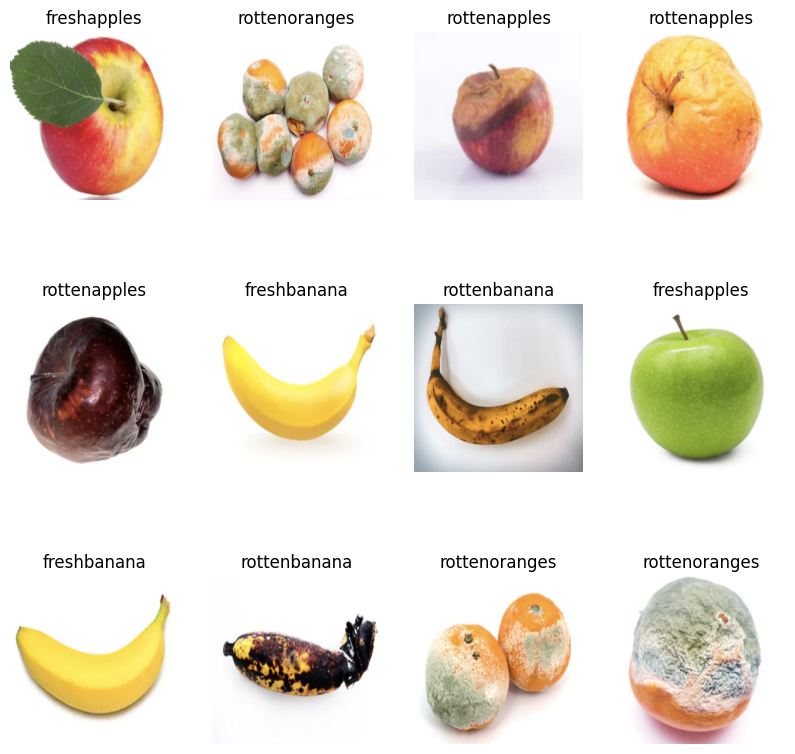

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

In [ ]:
def get_dataset(ds,train_split = 0.80, val_split =0.1,test_split = 0.1,shuffle=True, shuffle_size=10000):
  assert (train_split+test_split+val_split)==1

  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [ ]:
len(train_ds)

30

In [ ]:
len(val_ds)

3

In [ ]:
len(test_ds)

5

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# building the build (train only)

In [ ]:
if STATUS == "train":
  resize_and_rescale = tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
      layers.experimental.preprocessing.Rescaling(1./255)
                                            ])

In [ ]:
# data augmentation (train only)

In [ ]:
if STATUS == "train":
  data_augmentation = tf.keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2),
                                            ])

In [ ]:
# apply data augmentation on training data (train only)

In [ ]:
if STATUS == "train":
  train_ds = train_ds.map(
      lambda x,y: (data_augmentation(x, training=True),y)
  ).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# model (train only)

In [ ]:
if STATUS == "train":
  from keras.api._v2.keras import activations
  input_shape =(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
  n_classes = 6

  model = models.Sequential([
      resize_and_rescale,
      layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64,activation = 'relu'),
      layers.Dense(n_classes,activation = 'softmax'),

  ])

  model.build(input_shape=input_shape)

In [ ]:
if STATUS == "test":
  model = tf.keras.models.load_model(
      "/content/Image-Recognition-Fruit-Quality-detection/models/fruits.h5", custom_objects=None, compile=True, options=None
  )


  # Evaluate the restored model
  loss, acc = model.evaluate(test_ds, verbose=2)
  print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

  print(model.predict(test_ds).shape)

5/5 - 15s - loss: 0.3508 - accuracy: 0.8625 - 15s/epoch - 3s/step
Restored model, accuracy: 86.25%
5/5 [==============================] - 0s 35ms/step
(160, 6)


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)      

In [ ]:
# compiling the model

In [ ]:
if STATUS == "train":
  model.compile(
      optimizer='adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy']
  )

In [ ]:
if STATUS == "train":
  history = model.fit(
      train_ds,
      batch_size=BATCH_SIZE,
      validation_data = val_ds,
      verbose = 1,
      epochs = 40,

  )

In [ ]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 0s 35ms/step - loss: 0.3508 - accuracy: 0.8625


In [ ]:
scores

[0.3507523238658905, 0.862500011920929]

In [ ]:
if STATUS == "train":
  history
  history.params
  history.history.keys()
  type(history.history['loss'])
  len(history.history['loss'])
  history.history['loss'][:5]
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

In [ ]:
if STATUS == "train":
  plt.figure(figsize =(8,8))
  plt.subplot(1,2,1)
  plt.plot(range(EPOCHS),acc,label='Training Accuracy')
  plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1,2,1)
  plt.plot(range(EPOCHS),loss,label='Training Loss')
  plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

first image to predict
actual label: freshoranges
1/1 [==============================] - 0s 137ms/step
predicted label: freshoranges


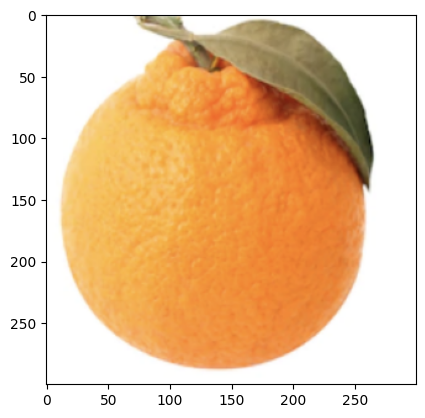

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


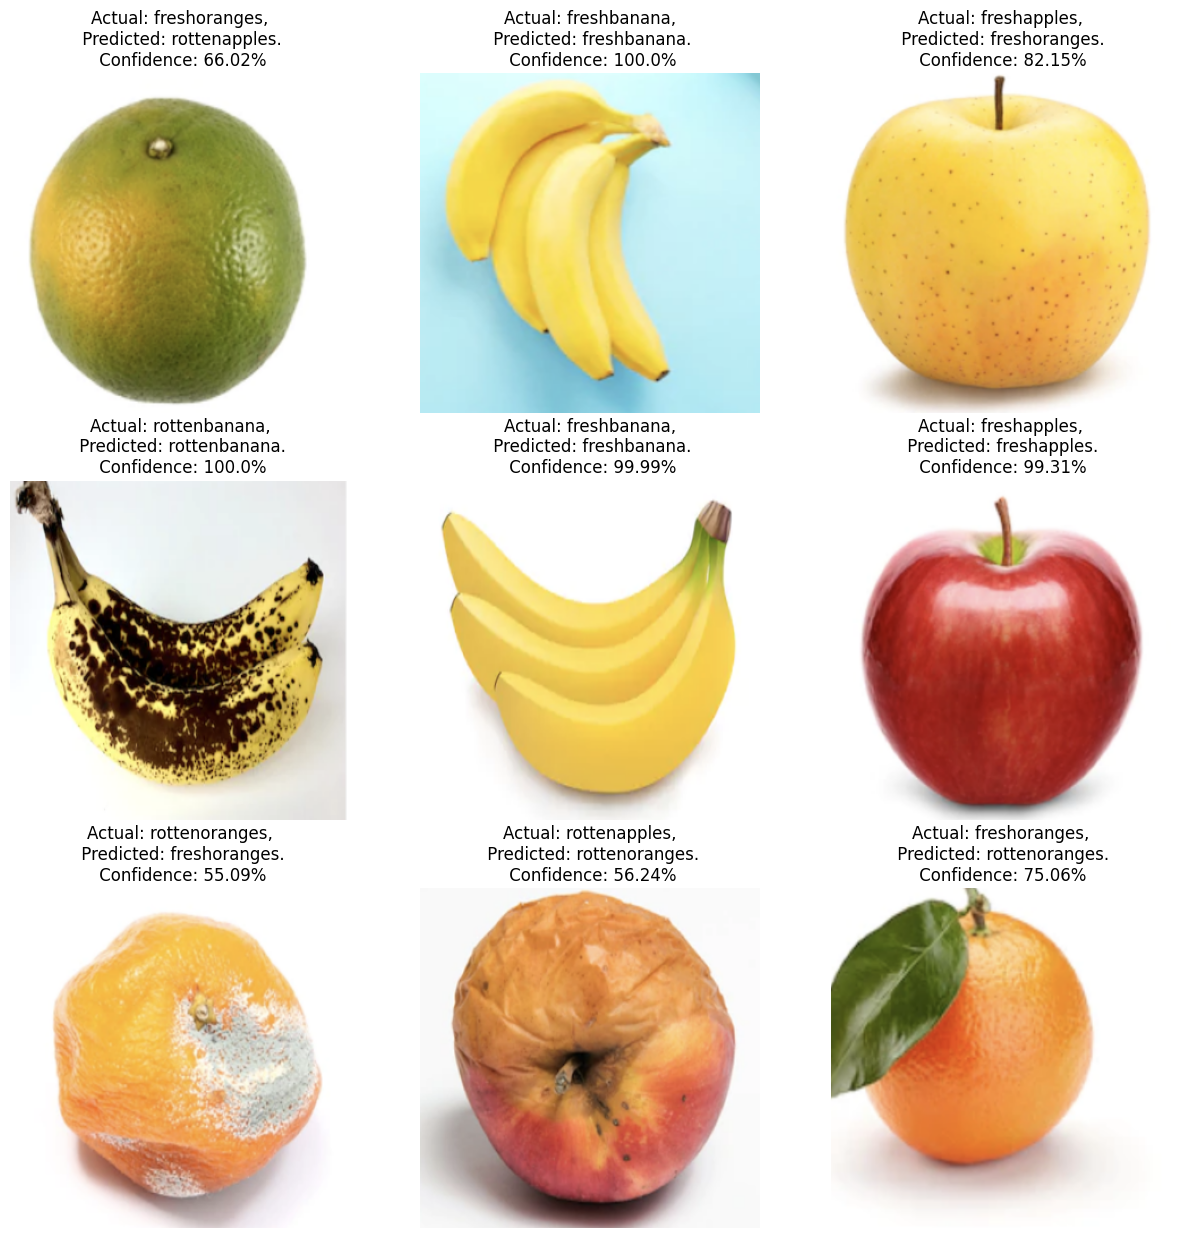

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import os


In [ ]:
# !mkdir models

In [ ]:
# model_version=max([int(i) for i in os.listdir("models") + [0]])+1
# model.save(f"models/{model_version}")

In [ ]:
# model.save("models/fruits.h5")

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
import gradio as gr

In [ ]:

class_names = dataset.class_names
print(class_names)

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,300,300,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(6)}

In [ ]:
image = gr.inputs.Image(shape=(300,300))
label = gr.outputs.Label(num_top_classes=6)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 18ms/step
